In [2]:
using CSV
using DataFrames

# Import the data as dataframe from the Bitcoin.csv file, then sort the dataframe by date (descending)
notOrderedDataBitcoin = CSV.read("./Bitcoin.csv",DataFrame);
dataBitcoin = sort!(notOrderedDataBitcoin)

# Take raw information and parse it to float number figures
dataBitcoin.Price .= replace.(dataBitcoin.Price, "," => "");
dataBitcoin.PriceFloat = parse.(Float64, dataBitcoin.Price);

In [3]:
# Display dataframe
println(dataBitcoin)

29×8 DataFrame
 Row │ Date          Price     Open      High      Low       Vol.     Change %  PriceFloat 
     │ String15      String15  String15  String15  String15  String7  String7   Float64    
─────┼─────────────────────────────────────────────────────────────────────────────────────
   1 │ Feb 07, 2022  43833.9   42,385.2  44,468.3  41,695.4  76.60K   3.40%        43833.9
   2 │ Feb 08, 2022  44038.2   43,833.9  45,399.8  42,705.0  92.88K   0.47%        44038.2
   3 │ Feb 09, 2022  44388.9   44,038.2  44,800.4  43,163.0  50.92K   0.80%        44388.9
   4 │ Feb 10, 2022  43521.0   44,388.9  45,755.2  43,242.5  89.69K   -1.96%       43521.0
   5 │ Feb 11, 2022  42388.4   43,519.3  43,915.1  42,023.4  69.95K   -2.60%       42388.4
   6 │ Feb 12, 2022  42205.2   42,388.4  43,006.4  41,776.8  37.88K   -0.43%       42205.2
   7 │ Feb 13, 2022  42061.1   42,205.5  42,725.1  41,880.1  25.88K   -0.34%       42061.1
   8 │ Feb 14, 2022  42550.3   42,061.1  42,799.7  41,591.3  53.60K   1.

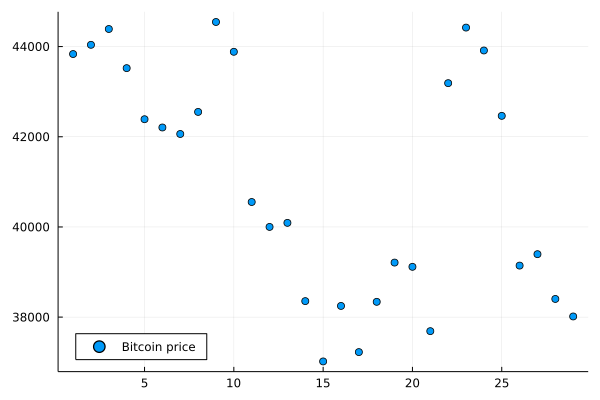

In [34]:
using Plots

# Plot bitcoin price(USD) over the time period (25 days)
plot(dataBitcoin.PriceFloat,seriestype = :scatter, label="Bitcoin price", legend= :bottomleft)

Least squares formulation:
\begin{equation*}
\tilde{x} = \mbox{arg min}_{x} \| Ax - b \|_2^2
\end{equation*}

This formulation could be derived using the fact that the sum formulation can be written in matrix terms

In [51]:
using LinearAlgebra

N = size(dataBitcoin.PriceFloat,1); # Get the number of entries in the bitcoin dataframe

A_1 = ones(N,1); 
A_2 = Array((1:N)); # Create an array with an enumeration of the registered dates

A = [A_1 A_2];
b = Array(dataBitcoin.PriceFloat);

xhat = A\b # Find the solution of the system using the LinearAlgebra package.

2-element Vector{Float64}:
 43222.448029556646
  -150.00733990147796

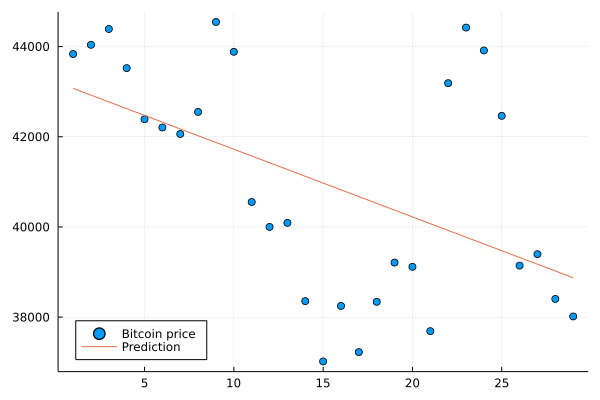

In [40]:
pred = Vector{Float64}(undef, N) # Initializing prediction vector of size N and undefined values
dim = size(xhat,1) # Get the dimension of the solution (xhat)

for i in 1:dim     # Construct the prediction vector 
    pred += (xhat[i]*A[:,i])
end

plot(A[:,2],b, seriestype = :scatter, label="Bitcoin price", legend=:bottomleft)
plot!(A[:,2],pred, label="Prediction") 

In [48]:
using LinearAlgebra

N = size(dataBitcoin.PriceFloat,1); # Get the number of entries in the bitcoin dataframe

A_1 = ones(N,1); 
A_2 = Array((1:N)); # Create an array with an enumeration of the registered dates
A_3 = [a^2 for a in A_2];
A_4 = [a^3 for a in A_2];
A_5 = [a^4 for a in A_2];
A_6 = [a^5 for a in A_2];

b = Array(dataBitcoin.PriceFloat);

A = [A_1 A_2 A_3 A_4 A_5 A_6]

xhat = A\b

6-element Vector{Float64}:
 44103.94895372782
  -412.2229971360876
   162.04177143501374
   -26.577394194364526
     1.4269332290789905
    -0.024054609375479544

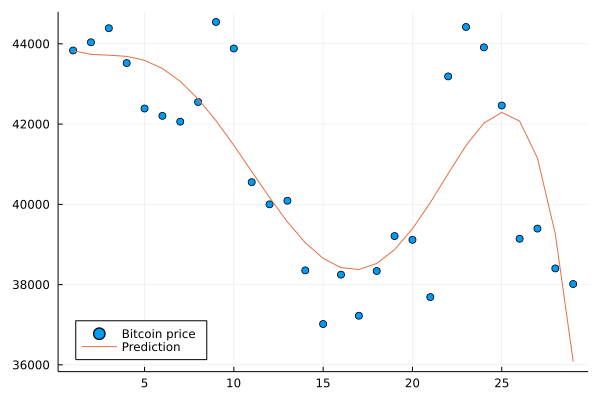

In [49]:
pred = Vector{Float64}(undef, N) # Initializing prediction vector of size N and undefined values
dim = size(xhat,1) # Get the dimension of the solution (xhat)

for i in 1:dim     # Construct the prediction vector 
    pred += (xhat[i]*A[:,i])
end

plot(A[:,2],b, seriestype = :scatter, label="Bitcoin price", legend=:bottomleft)
plot!(A[:,2],pred, label="Prediction")

Using this prediction it can be calculated the relative error of this aproximation over the dataset:

In [89]:
err = Vector{Float64}(undef, N)
errabs = Vector{Float64}(undef, N)
for i in 1:N
    
    err[i] = abs(b[i]-pred[i])
    
    errabs[i] = (err[i]/b[i])
    
    dig = 6
    
    rb = round(b[i],digits=dig)
    rpred = round(pred[i],digits=dig)
    rerr = round(err[i],digits=dig)
    rerrabs = round(errabs[i],digits=dig)
    
    println("$(rb) | $(rpred) | $(rerr) | $(rerrabs)%")
end
min = minimum(errabs)
max = maximum(errabs)
println("Minimum err: $min %")
print("Maximum err: $max %" )

43833.9 | 43828.593212 | 5.306788 | 0.000121%
44038.2 | 43737.112076 | 301.087924 | 0.006837%
44388.9 | 43717.802583 | 671.097417 | 0.015119%
43521.0 | 43687.435066 | 166.435066 | 0.003824%
42388.4 | 43588.366594 | 1199.966594 | 0.028309%
42205.2 | 43385.654419 | 1180.454419 | 0.027969%
42061.1 | 43064.169429 | 1003.069429 | 0.023848%
42550.3 | 42625.709587 | 75.409587 | 0.001772%
44544.4 | 42086.113385 | 2458.286615 | 0.055187%
43883.6 | 41472.373285 | 2411.226715 | 0.054946%
40552.8 | 40819.749169 | 266.949169 | 0.006583%
40000.1 | 40168.881785 | 168.781785 | 0.00422%
40090.3 | 39562.906195 | 527.393805 | 0.013155%
38355.0 | 39044.565221 | 689.565221 | 0.017978%
37017.7 | 38653.322891 | 1635.622891 | 0.044185%
38248.2 | 38422.477887 | 174.277887 | 0.004556%
37224.6 | 38376.276992 | 1151.676992 | 0.030939%
38339.2 | 38527.028536 | 187.828536 | 0.004899%
39209.6 | 38872.215844 | 337.384156 | 0.008605%
39115.5 | 39391.610681 | 276.110681 | 0.007059%
37689.1 | 40044.386702 | 2355.286702 